In [1]:
import pandas as pd
from IPython.core import display as ICD
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import SpectralClustering

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_excel("complete_data.xlsx")

In [3]:
df = df.drop(["Unnamed: 0","Timestamp","Kmeans"],axis=1)

In [4]:
df.groupby("เพศ").mean()

,AGE,อาหารญี่ปุ่น,อาหารจึน,อาหารไทย,อาหารอีสาน,อาหารสุขภาพ,บุฟเฟต์,ชาบูชาบู,ปิ้งย่าง,เหล้าเบียร์,...,ความถี่ ดู Youtube,ความถี่ ดู Netflix,ความถี่ Content ด้านบันเทิง,ความถี่ Content เกี่่ยวกับเกมส์,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,ความถี่ Content เกี่ยวกับการท่องเที่ยว,ความถี่ Content เกี่ยวกับการแต่งบ้าน,ความถี่ Content เกี่ยวกับการโทรทัศน์,ความถี่ Content เกี่ยวกับละคร,ความถี่ Content เกี่ยวกับการเมือง
เพศ,,,,,,,,,,,,,,,,,,,,,
ชาย,31.485714,2.114286,0.628571,1.600000,1.085714,0.971429,1.428571,1.714286,1.742857,0.542857,...,4.600000,3.400000,2.457143,2.742857,2.714286,2.514286,1.857143,1.085714,0.885714,3.685714
หญิง,30.428571,2.035714,0.821429,1.678571,1.250000,1.000000,1.392857,1.642857,1.428571,-0.428571,...,4.357143,3.285714,3.535714,1.714286,3.428571,3.392857,2.535714,1.785714,2.107143,2.571429


In [5]:
ls_like = ['อาหารญี่ปุ่น',
       'อาหารจึน', 'อาหารไทย', 'อาหารอีสาน', 'อาหารสุขภาพ', 'บุฟเฟต์',
       'ชาบูชาบู', 'ปิ้งย่าง', 'เหล้าเบียร์', 'เสื้อผ้าแฟชั่น', 'แต่งหน้า',
       'skincare บำรุงผิว', 'การออกกำลังกาย', 'การเล่นเกมส์', 'การท่องเที่ยว',
       'การอ่านหนังสือ', 'การอ่านบทความ Online', 'การเรียน e-learning',
       'ดู Series', 'ดูหนัง', 'ดู Youtube', 'ดู Netflix',
       'Content ด้านบันเทิง', 'Content เกี่่ยวกับเกมส์',
       'Content เกี่ยวกับการ review ร้านอาหาร',
       'Content เกี่ยวกับการท่องเที่ยว', 'Content เกี่ยวกับการแต่งบ้าน',
       'Content เกี่ยวกับการโทรทัศน์', 'Content เกี่ยวกับละคร',
       'Content เกี่ยวกับการเมือง']
ls_freq = ['ความถี่ อาหารญี่ปุ่น', 'ความถี่ อาหารจึน',
       'ความถี่ อาหารไทย', 'ความถี่ อาหารอีสาน', 'ความถี่ อาหารสุขภาพ',
       'ความถี่ บุฟเฟต์', 'ความถี่ ชาบูชาบู', 'ความถี่ ปิ้งย่าง',
       'ความถี่ เหล้าเบียร์', 'ความถี่ เสื้อผ้าแฟชั่น', 'ความถี่ แต่งหน้า',
       'ความถี่ skincare บำรุงผิว', 'ความถี่ การออกกำลังกาย',
       'ความถี่ การเล่นเกมส์', 'ความถี่ การท่องเที่ยว',
       'ความถี่ การอ่านหนังสือ', 'ความถี่ การอ่านบทความ Online',
       'ความถี่ การเรียน e-learning', 'ความถี่ ดู Series', 'ความถี่ ดูหนัง',
       'ความถี่ ดู Youtube', 'ความถี่ ดู Netflix',
       'ความถี่ Content ด้านบันเทิง', 'ความถี่ Content เกี่่ยวกับเกมส์',
       'ความถี่ Content เกี่ยวกับการ review ร้านอาหาร',
       'ความถี่ Content เกี่ยวกับการท่องเที่ยว',
       'ความถี่ Content เกี่ยวกับการแต่งบ้าน',
       'ความถี่ Content เกี่ยวกับการโทรทัศน์', 'ความถี่ Content เกี่ยวกับละคร',
       'ความถี่ Content เกี่ยวกับการเมือง']

In [6]:
ls_like_adj = ["AGE","เพศ"]
ls_like_adj.extend(ls_like)
ls_freq_adj = ["AGE","เพศ"]
ls_freq_adj.extend(ls_freq)
df_like = df[ls_like_adj]
df_freq = df[ls_freq_adj]

# Description Statistics

In [7]:
like_con = df_like.mean().reset_index().rename({"index":"Topic",0:"Avg_Rating"},axis=1).iloc[1:,:]
like_con.sort_values("Avg_Rating",ascending=False).head(10)

,Topic,Avg_Rating
1,อาหารญี่ปุ่น,2.079365
15,การท่องเที่ยว,2.031746
20,ดูหนัง,1.714286
22,ดู Netflix,1.698413
7,ชาบูชาบู,1.682540
3,อาหารไทย,1.634921
8,ปิ้งย่าง,1.603175
21,ดู Youtube,1.603175
19,ดู Series,1.587302
26,Content เกี่ยวกับการท่องเที่ยว,1.460317


In [8]:
freq_con = df_freq.mean().reset_index().rename({"index":"Topic",0:"Avg_Rating"},axis=1).iloc[1:,:]
freq_con.sort_values("Avg_Rating",ascending=False).head(10)

,Topic,Avg_Rating
3,ความถี่ อาหารไทย,4.714286
21,ความถี่ ดู Youtube,4.492063
17,ความถี่ การอ่านบทความ Online,3.920635
22,ความถี่ ดู Netflix,3.349206
4,ความถี่ อาหารอีสาน,3.206349
30,ความถี่ Content เกี่ยวกับการเมือง,3.190476
19,ความถี่ ดู Series,3.174603
16,ความถี่ การอ่านหนังสือ,3.174603
18,ความถี่ การเรียน e-learning,3.126984
13,ความถี่ การออกกำลังกาย,3.063492


# Correlation

In [9]:
all_ls = []
all_ls.extend(ls_like)
all_ls.extend(ls_freq)
df_cor_like_tab = df[ls_like]
df_cor_freq_tab = df[ls_freq]
df_cor_all_tab = df[all_ls]
df_cor_like = df_cor_like_tab.corr().reset_index()
df_cor_freq = df_cor_freq_tab.corr().reset_index()
df_cor_all = df_cor_all_tab.corr().reset_index()

In [10]:
df_cor_like_all = pd.DataFrame()
for i in ls_like :
    df_corr = df_cor_like[["index",i]].sort_values(i,ascending=False)
    df_corr = df_corr[(df_corr[i]>=0.4) | (df_corr[i]<=-0.4)]
    nm_col = df_corr.columns[1]
    df_corr = df_corr.rename({"index":"X1",i:"Peason"},axis=1)
    df_corr["X2"] = nm_col
    df_corr = df_corr[["X1","X2","Peason"]]
    df_cor_like_all = df_cor_like_all.append(df_corr)
df_like_cor_ol = df_cor_like_all[df_cor_like_all["X1"] != df_cor_like_all["X2"]]
ICD.display(df_like_cor_ol.sort_values("Peason",ascending=False).iloc[::2,:])

,X1,X2,Peason
13,การเล่นเกมส์,Content เกี่่ยวกับเกมส์,0.805294
15,การอ่านหนังสือ,การอ่านบทความ Online,0.764398
28,Content เกี่ยวกับละคร,Content เกี่ยวกับการโทรทัศน์,0.764217
11,skincare บำรุงผิว,แต่งหน้า,0.726883
28,Content เกี่ยวกับละคร,Content ด้านบันเทิง,0.725700
5,บุฟเฟต์,ชาบูชาบู,0.708651
18,ดู Series,ดู Netflix,0.700209
14,การท่องเที่ยว,Content เกี่ยวกับการท่องเที่ยว,0.690634
19,ดูหนัง,ดู Series,0.664786
25,Content เกี่ยวกับการท่องเที่ยว,Content เกี่ยวกับการแต่งบ้าน,0.634111


In [11]:
df_cor_freq_all = pd.DataFrame()
for i in ls_freq :
    df_corr = df_cor_freq[["index",i]].sort_values(i,ascending=False)
    df_corr = df_corr[(df_corr[i]>=0.4) | (df_corr[i]<=-0.4)]
    nm_col = df_corr.columns[1]
    df_corr = df_corr.rename({"index":"X1",i:"Peason"},axis=1)
    df_corr["X2"] = nm_col
    df_corr = df_corr[["X1","X2","Peason"]]
    df_cor_freq_all = df_cor_freq_all.append(df_corr)
df_freq_cor_ol = df_cor_freq_all[df_cor_freq_all["X1"] != df_cor_freq_all["X2"]]
ICD.display(df_freq_cor_ol.sort_values("Peason",ascending=False).iloc[::2,:])

,X1,X2,Peason
28,ความถี่ Content เกี่ยวกับละคร,ความถี่ Content เกี่ยวกับการโทรทัศน์,0.814394
13,ความถี่ การเล่นเกมส์,ความถี่ Content เกี่่ยวกับเกมส์,0.747001
18,ความถี่ ดู Series,ความถี่ ดู Netflix,0.707700
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.688201
6,ความถี่ ชาบูชาบู,ความถี่ บุฟเฟต์,0.684628
11,ความถี่ skincare บำรุงผิว,ความถี่ แต่งหน้า,0.673674
26,ความถี่ Content เกี่ยวกับการแต่งบ้าน,ความถี่ Content เกี่ยวกับการท่องเที่ยว,0.611209
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,ความถี่ การท่องเที่ยว,0.575483
9,ความถี่ เสื้อผ้าแฟชั่น,ความถี่ แต่งหน้า,0.566956
0,ความถี่ อาหารญี่ปุ่น,ความถี่ ชาบูชาบู,0.553200


In [12]:
df_cor_all_all = pd.DataFrame()
for i in all_ls :
    df_corr = df_cor_all[["index",i]].sort_values(i,ascending=False)
    df_corr = df_corr[(df_corr[i]>=0.4) | (df_corr[i]<=-0.4)]
    nm_col = df_corr.columns[1]
    df_corr = df_corr.rename({"index":"X1",i:"Peason"},axis=1)
    df_corr["X2"] = nm_col
    df_corr = df_corr[["X1","X2","Peason"]]
    df_cor_all_all = df_cor_all_all.append(df_corr)
df_all_cor_ol = df_cor_all_all[df_cor_all_all["X1"] != df_cor_all_all["X2"]]
ICD.display(df_all_cor_ol.sort_values("Peason",ascending=False).iloc[::2,:].head(10))

,X1,X2,Peason
57,ความถี่ Content เกี่ยวกับการโทรทัศน์,ความถี่ Content เกี่ยวกับละคร,0.814394
23,Content เกี่่ยวกับเกมส์,การเล่นเกมส์,0.805294
40,ความถี่ แต่งหน้า,แต่งหน้า,0.799858
22,Content ด้านบันเทิง,ความถี่ Content ด้านบันเทิง,0.769667
15,การอ่านหนังสือ,การอ่านบทความ Online,0.764398
28,Content เกี่ยวกับละคร,Content เกี่ยวกับการโทรทัศน์,0.764217
56,ความถี่ Content เกี่ยวกับการแต่งบ้าน,Content เกี่ยวกับการแต่งบ้าน,0.755546
43,ความถี่ การเล่นเกมส์,การเล่นเกมส์,0.749486
8,เหล้าเบียร์,ความถี่ เหล้าเบียร์,0.749310
53,ความถี่ Content เกี่่ยวกับเกมส์,ความถี่ การเล่นเกมส์,0.747001


# Clustering

In [13]:
def elbow_curve(df_input_x):
  distortions = []
  K = range(1,10)
  for k in K:
      kmeanModel = KMeans(n_clusters=k,random_state=123)
      kmeanModel.fit(df_input_x)
      distortions.append(kmeanModel.inertia_)
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  return distortions,plt.show()
def cut_eps(input_x) :
  neigh = NearestNeighbors(n_neighbors=2)
  nbrs = neigh.fit(input_x)
  distances, indices = nbrs.kneighbors(input_x)
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  return plt.plot(distances)

# Topic Interest

In [14]:
topic_data = df_cor_like_tab.describe().T.reset_index().rename({"index":"Interest"},axis=1).drop(["count","max"],axis=1)

In [15]:
topic_median = df_cor_like_tab.median().tolist()

In [16]:
# topic_data["Median"] = topic_median

In [17]:
topic_data = topic_data.iloc[:22,:]

In [18]:
topic_data = topic_data[topic_data["Interest"].str.count("อาหาร")==0]

In [19]:
from sklearn.preprocessing import StandardScaler

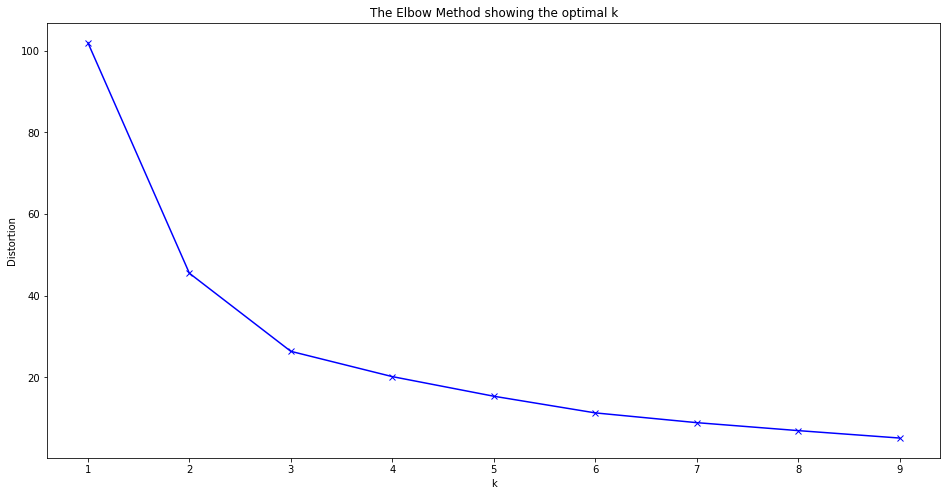

([102.0,
  45.5016175272798,
  26.358177414311662,
  20.162533766036816,
  15.35618304830812,
  11.27154666475273,
  8.878314904710741,
  6.927654450859942,
  5.10737685288705],
 None)

In [20]:
topic_data_x = topic_data.drop("Interest",axis=1)
sc = StandardScaler()
X_Topic = sc.fit_transform(topic_data_x)
elbow_curve(X_Topic)

In [21]:
heirach_Topic = AgglomerativeClustering(n_clusters=4).fit(X_Topic)
kmeans = KMeans(n_clusters=4,random_state=123).fit(X_Topic)
Spec_clustering = SpectralClustering(n_clusters=4,degree=2,assign_labels="kmeans",random_state=123).fit(X_Topic)

In [22]:
topic_data["Cluster_Topic"] = heirach_Topic.labels_
topic_data["KMeans_Topic"] = kmeans.labels_
topic_data["Spec_Topic"] = Spec_clustering.labels_

In [23]:
ICD.display(topic_data[topic_data["Cluster_Topic"] == 0])#ยามว่าง
ICD.display(topic_data[topic_data["Cluster_Topic"] == 1])#พัฒนาตัวเอง
ICD.display(topic_data[topic_data["Cluster_Topic"] == 2])#Gender interest
ICD.display(topic_data[topic_data["Cluster_Topic"] == 3])#life style
# ICD.display(topic_data[topic_data["Spec_Topic"] == 4])

,Interest,mean,std,min,25%,50%,75%,Cluster_Topic,KMeans_Topic,Spec_Topic
5,บุฟเฟต์,1.412698,1.315355,-2.0,0.0,2.0,3.0,0,3,2
6,ชาบูชาบู,1.682540,1.059906,-1.0,1.0,2.0,3.0,0,3,2
7,ปิ้งย่าง,1.603175,1.040156,-1.0,1.0,2.0,2.0,0,0,2
14,การท่องเที่ยว,2.031746,1.092028,-2.0,1.0,2.0,3.0,0,3,2
18,ดู Series,1.587302,1.087093,-1.0,1.0,2.0,2.5,0,0,2
19,ดูหนัง,1.714286,1.084027,-2.0,1.0,2.0,3.0,0,3,2
20,ดู Youtube,1.603175,1.100435,-2.0,1.0,2.0,2.5,0,3,2
21,ดู Netflix,1.698413,1.041632,-1.0,1.0,2.0,2.0,0,0,2


,Interest,mean,std,min,25%,50%,75%,Cluster_Topic,KMeans_Topic,Spec_Topic
12,การออกกำลังกาย,1.238095,1.146021,-2.0,0.5,1.0,2.0,1,2,2
15,การอ่านหนังสือ,1.158730,1.272619,-3.0,1.0,1.0,2.0,1,2,2
16,การอ่านบทความ Online,1.333333,1.204829,-3.0,1.0,1.0,2.0,1,2,2
17,การเรียน e-learning,1.365079,1.020777,-1.0,1.0,1.0,2.0,1,0,2


,Interest,mean,std,min,25%,50%,75%,Cluster_Topic,KMeans_Topic,Spec_Topic
9,เสื้อผ้าแฟชั่น,0.619048,1.474827,-3.0,0.0,1.0,1.0,2,2,0
11,skincare บำรุงผิว,0.698413,1.642529,-3.0,0.0,1.0,2.0,2,2,0
13,การเล่นเกมส์,1.142857,1.605004,-3.0,0.0,1.0,3.0,2,2,0


,Interest,mean,std,min,25%,50%,75%,Cluster_Topic,KMeans_Topic,Spec_Topic
8,เหล้าเบียร์,0.111111,1.968388,-3.0,-1.0,0.0,2.0,3,1,3
10,แต่งหน้า,-0.428571,1.956909,-3.0,-2.0,0.0,1.0,3,1,1


In [24]:
ls_topic_freetime = topic_data[topic_data["Cluster_Topic"] == 0]["Interest"].tolist()
ls_topic_improve = topic_data[topic_data["Cluster_Topic"] == 1]["Interest"].tolist()
ls_topic_lifestyle =topic_data[topic_data["Cluster_Topic"] == 2]["Interest"].tolist()
ls_topic_genderspec =topic_data[topic_data["Cluster_Topic"] == 3]["Interest"].tolist()

In [25]:
ls_topic_genderspec

['เหล้าเบียร์', 'แต่งหน้า']

# Topic Frequency

In [26]:
topic_data_freq = df_cor_freq_tab.describe().T.reset_index().rename({"index":"Freq"},axis=1).drop(["count","max"],axis=1)

In [27]:
topic_data_freq = topic_data_freq.iloc[:22]

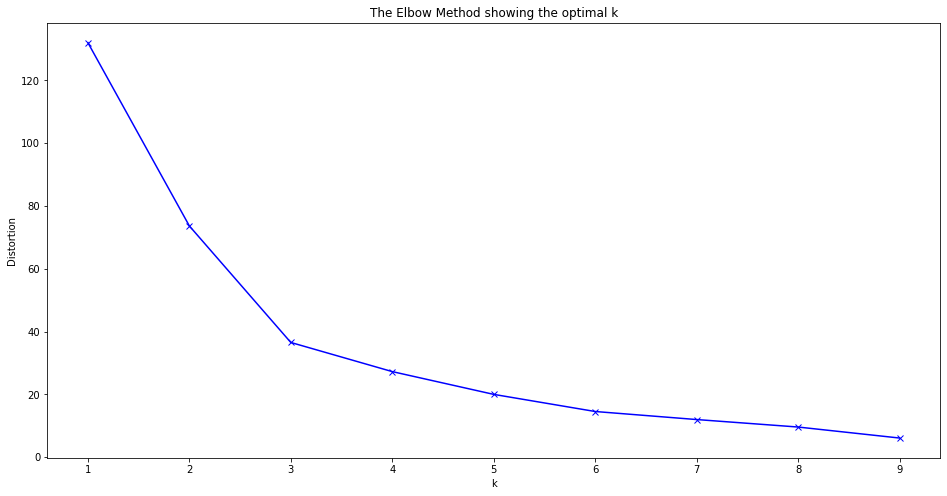

([132.0,
  73.63472350793936,
  36.52373811444524,
  27.243113065405556,
  19.991119896754523,
  14.535893283623968,
  11.975466962410517,
  9.590397394922583,
  6.087288673469166],
 None)

In [28]:
topic_data_freq_x = topic_data_freq.drop("Freq",axis=1)
# sc = StandardScaler()
X_Topic_freq = sc.fit_transform(topic_data_freq_x)
elbow_curve(X_Topic_freq)

In [29]:
heirach_Topic_freq = AgglomerativeClustering(n_clusters=4).fit(X_Topic_freq)
kmeans_freq = KMeans(n_clusters=4,random_state=123).fit(X_Topic_freq)
Spec_clustering_freq = SpectralClustering(n_clusters=4,assign_labels="discretize",random_state=123).fit(X_Topic_freq)

In [30]:
topic_data_freq["Cluster_Topic_freq"] = heirach_Topic_freq.labels_
topic_data_freq["KMeans_Topic_freq"] = kmeans_freq.labels_
topic_data_freq["Spec_Topic_freq"] = Spec_clustering_freq.labels_

In [31]:
ICD.display(topic_data_freq[topic_data_freq["Spec_Topic_freq"] == 0])#ยามว่าง
ICD.display(topic_data_freq[topic_data_freq["Spec_Topic_freq"] == 1])#พัฒนาตัวเอง
ICD.display(topic_data_freq[topic_data_freq["Spec_Topic_freq"] == 2])#Gender interest
ICD.display(topic_data_freq[topic_data_freq["Spec_Topic_freq"] == 3])#life style
# ICD.display(topic_data[topic_data["Spec_Topic"] == 4])

,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
1,ความถี่ อาหารจึน,1.412698,1.101830,0.0,1.0,1.0,2.0,0,0,0
5,ความถี่ บุฟเฟต์,1.984127,0.906821,0.0,1.0,2.0,3.0,0,0,0
6,ความถี่ ชาบูชาบู,2.063492,0.858976,0.0,1.5,2.0,3.0,0,0,0
7,ความถี่ ปิ้งย่าง,2.015873,0.813040,0.0,1.0,2.0,3.0,0,0,0
8,ความถี่ เหล้าเบียร์,1.539683,1.511519,0.0,0.0,1.0,3.0,0,3,0
9,ความถี่ เสื้อผ้าแฟชั่น,1.698413,1.199932,0.0,1.0,2.0,2.5,0,0,0
10,ความถี่ แต่งหน้า,1.253968,1.750283,0.0,0.0,0.0,2.0,0,3,0
14,ความถี่ การท่องเที่ยว,1.523810,1.060389,0.0,1.0,1.0,2.0,0,0,0


,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
0,ความถี่ อาหารญี่ปุ่น,2.920635,1.09694,1.0,2.0,3.0,4.0,1,1,1
17,ความถี่ การเรียน e-learning,3.126984,1.18447,1.0,2.0,3.0,4.0,1,1,1


,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
3,ความถี่ อาหารอีสาน,3.206349,1.094837,0.0,3.0,3.0,4.0,1,1,2
4,ความถี่ อาหารสุขภาพ,2.603175,1.670809,0.0,1.0,3.0,4.0,3,1,2
11,ความถี่ skincare บำรุงผิว,2.253968,1.900494,0.0,1.0,1.0,4.5,3,3,2
12,ความถี่ การออกกำลังกาย,3.063492,1.625135,0.0,2.0,3.0,4.0,3,1,2
13,ความถี่ การเล่นเกมส์,3.015873,1.995900,0.0,1.0,4.0,5.0,3,1,2
15,ความถี่ การอ่านหนังสือ,3.174603,1.385870,0.0,2.0,3.0,4.0,3,1,2
16,ความถี่ การอ่านบทความ Online,3.920635,1.222129,0.0,3.0,4.0,5.0,1,1,2
18,ความถี่ ดู Series,3.174603,1.519122,0.0,2.0,3.0,4.5,3,1,2
19,ความถี่ ดูหนัง,2.920635,1.428981,0.0,2.0,3.0,4.0,3,1,2
21,ความถี่ ดู Netflix,3.349206,1.577654,0.0,3.0,4.0,4.5,1,1,2


,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
2,ความถี่ อาหารไทย,4.714286,0.727979,2.0,5.0,5.0,5.0,2,2,3
20,ความถี่ ดู Youtube,4.492063,0.820563,2.0,4.0,5.0,5.0,2,2,3


In [32]:
ICD.display(topic_data_freq[topic_data_freq["KMeans_Topic_freq"] == 0])#ยามว่าง
ICD.display(topic_data_freq[topic_data_freq["KMeans_Topic_freq"] == 1])#พัฒนาตัวเอง
ICD.display(topic_data_freq[topic_data_freq["KMeans_Topic_freq"] == 2])#Gender interest
ICD.display(topic_data_freq[topic_data_freq["KMeans_Topic_freq"] == 3])#life style
# ICD.display(topic_data[topic_data["Spec_Topic"] == 4])

,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
1,ความถี่ อาหารจึน,1.412698,1.101830,0.0,1.0,1.0,2.0,0,0,0
5,ความถี่ บุฟเฟต์,1.984127,0.906821,0.0,1.0,2.0,3.0,0,0,0
6,ความถี่ ชาบูชาบู,2.063492,0.858976,0.0,1.5,2.0,3.0,0,0,0
7,ความถี่ ปิ้งย่าง,2.015873,0.813040,0.0,1.0,2.0,3.0,0,0,0
9,ความถี่ เสื้อผ้าแฟชั่น,1.698413,1.199932,0.0,1.0,2.0,2.5,0,0,0
14,ความถี่ การท่องเที่ยว,1.523810,1.060389,0.0,1.0,1.0,2.0,0,0,0


,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
0,ความถี่ อาหารญี่ปุ่น,2.920635,1.096940,1.0,2.0,3.0,4.0,1,1,1
3,ความถี่ อาหารอีสาน,3.206349,1.094837,0.0,3.0,3.0,4.0,1,1,2
4,ความถี่ อาหารสุขภาพ,2.603175,1.670809,0.0,1.0,3.0,4.0,3,1,2
12,ความถี่ การออกกำลังกาย,3.063492,1.625135,0.0,2.0,3.0,4.0,3,1,2
13,ความถี่ การเล่นเกมส์,3.015873,1.995900,0.0,1.0,4.0,5.0,3,1,2
15,ความถี่ การอ่านหนังสือ,3.174603,1.385870,0.0,2.0,3.0,4.0,3,1,2
16,ความถี่ การอ่านบทความ Online,3.920635,1.222129,0.0,3.0,4.0,5.0,1,1,2
17,ความถี่ การเรียน e-learning,3.126984,1.184470,1.0,2.0,3.0,4.0,1,1,1
18,ความถี่ ดู Series,3.174603,1.519122,0.0,2.0,3.0,4.5,3,1,2
19,ความถี่ ดูหนัง,2.920635,1.428981,0.0,2.0,3.0,4.0,3,1,2


,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
2,ความถี่ อาหารไทย,4.714286,0.727979,2.0,5.0,5.0,5.0,2,2,3
20,ความถี่ ดู Youtube,4.492063,0.820563,2.0,4.0,5.0,5.0,2,2,3


,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
8,ความถี่ เหล้าเบียร์,1.539683,1.511519,0.0,0.0,1.0,3.0,0,3,0
10,ความถี่ แต่งหน้า,1.253968,1.750283,0.0,0.0,0.0,2.0,0,3,0
11,ความถี่ skincare บำรุงผิว,2.253968,1.900494,0.0,1.0,1.0,4.5,3,3,2


In [33]:
ICD.display(topic_data_freq[topic_data_freq["Cluster_Topic_freq"] == 0])#BasisLife
ICD.display(topic_data_freq[topic_data_freq["Cluster_Topic_freq"] == 1])#Preference
ICD.display(topic_data_freq[topic_data_freq["Cluster_Topic_freq"] == 2])#EveryDay
ICD.display(topic_data_freq[topic_data_freq["Cluster_Topic_freq"] == 3])#TakeSelf
# ICD.display(topic_data[topic_data["Spec_Topic"] == 4])

,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
1,ความถี่ อาหารจึน,1.412698,1.101830,0.0,1.0,1.0,2.0,0,0,0
5,ความถี่ บุฟเฟต์,1.984127,0.906821,0.0,1.0,2.0,3.0,0,0,0
6,ความถี่ ชาบูชาบู,2.063492,0.858976,0.0,1.5,2.0,3.0,0,0,0
7,ความถี่ ปิ้งย่าง,2.015873,0.813040,0.0,1.0,2.0,3.0,0,0,0
8,ความถี่ เหล้าเบียร์,1.539683,1.511519,0.0,0.0,1.0,3.0,0,3,0
9,ความถี่ เสื้อผ้าแฟชั่น,1.698413,1.199932,0.0,1.0,2.0,2.5,0,0,0
10,ความถี่ แต่งหน้า,1.253968,1.750283,0.0,0.0,0.0,2.0,0,3,0
14,ความถี่ การท่องเที่ยว,1.523810,1.060389,0.0,1.0,1.0,2.0,0,0,0


,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
0,ความถี่ อาหารญี่ปุ่น,2.920635,1.096940,1.0,2.0,3.0,4.0,1,1,1
3,ความถี่ อาหารอีสาน,3.206349,1.094837,0.0,3.0,3.0,4.0,1,1,2
16,ความถี่ การอ่านบทความ Online,3.920635,1.222129,0.0,3.0,4.0,5.0,1,1,2
17,ความถี่ การเรียน e-learning,3.126984,1.184470,1.0,2.0,3.0,4.0,1,1,1
21,ความถี่ ดู Netflix,3.349206,1.577654,0.0,3.0,4.0,4.5,1,1,2


,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
2,ความถี่ อาหารไทย,4.714286,0.727979,2.0,5.0,5.0,5.0,2,2,3
20,ความถี่ ดู Youtube,4.492063,0.820563,2.0,4.0,5.0,5.0,2,2,3


,Freq,mean,std,min,25%,50%,75%,Cluster_Topic_freq,KMeans_Topic_freq,Spec_Topic_freq
4,ความถี่ อาหารสุขภาพ,2.603175,1.670809,0.0,1.0,3.0,4.0,3,1,2
11,ความถี่ skincare บำรุงผิว,2.253968,1.900494,0.0,1.0,1.0,4.5,3,3,2
12,ความถี่ การออกกำลังกาย,3.063492,1.625135,0.0,2.0,3.0,4.0,3,1,2
13,ความถี่ การเล่นเกมส์,3.015873,1.995900,0.0,1.0,4.0,5.0,3,1,2
15,ความถี่ การอ่านหนังสือ,3.174603,1.385870,0.0,2.0,3.0,4.0,3,1,2
18,ความถี่ ดู Series,3.174603,1.519122,0.0,2.0,3.0,4.5,3,1,2
19,ความถี่ ดูหนัง,2.920635,1.428981,0.0,2.0,3.0,4.0,3,1,2


In [34]:
ls_freq_basislife = topic_data_freq[topic_data_freq["Cluster_Topic_freq"] == 0]["Freq"].tolist()
ls_freq_specific = topic_data_freq[topic_data_freq["Cluster_Topic_freq"] == 1]["Freq"].tolist()
ls_freq_everyday = topic_data_freq[topic_data_freq["Cluster_Topic_freq"] == 2]["Freq"].tolist()
ls_freq_careself = topic_data_freq[topic_data_freq["Cluster_Topic_freq"] == 3]["Freq"].tolist()

# Group Clustering

In [35]:
grp_topic_interest = [ls_topic_freetime,ls_topic_improve,ls_topic_genderspec,ls_topic_lifestyle]
grp_nm_interest = ["FreeTime","ImproveSelf","GenderSpec","LifeStyle"]
grp_topic_interest

[['บุฟเฟต์',
  'ชาบูชาบู',
  'ปิ้งย่าง',
  'การท่องเที่ยว',
  'ดู Series',
  'ดูหนัง',
  'ดู Youtube',
  'ดู Netflix'],
 ['การออกกำลังกาย',
  'การอ่านหนังสือ',
  'การอ่านบทความ Online',
  'การเรียน e-learning'],
 ['เหล้าเบียร์', 'แต่งหน้า'],
 ['เสื้อผ้าแฟชั่น', 'skincare บำรุงผิว', 'การเล่นเกมส์']]

In [36]:
grp_topic_freq = [ls_freq_basislife,ls_freq_specific,ls_freq_everyday,ls_freq_careself]
grp_nm_freq = ["BasisLife","Specific","EveryDay","CareSelf"]
grp_topic_freq

[['ความถี่ อาหารจึน',
  'ความถี่ บุฟเฟต์',
  'ความถี่ ชาบูชาบู',
  'ความถี่ ปิ้งย่าง',
  'ความถี่ เหล้าเบียร์',
  'ความถี่ เสื้อผ้าแฟชั่น',
  'ความถี่ แต่งหน้า',
  'ความถี่ การท่องเที่ยว'],
 ['ความถี่ อาหารญี่ปุ่น',
  'ความถี่ อาหารอีสาน',
  'ความถี่ การอ่านบทความ Online',
  'ความถี่ การเรียน e-learning',
  'ความถี่ ดู Netflix'],
 ['ความถี่ อาหารไทย', 'ความถี่ ดู Youtube'],
 ['ความถี่ อาหารสุขภาพ',
  'ความถี่ skincare บำรุงผิว',
  'ความถี่ การออกกำลังกาย',
  'ความถี่ การเล่นเกมส์',
  'ความถี่ การอ่านหนังสือ',
  'ความถี่ ดู Series',
  'ความถี่ ดูหนัง']]

In [37]:
grp_df_interest = pd.DataFrame()
grp_df_freq = pd.DataFrame()

In [38]:
all_stat_des = df.describe().T.drop("AGE",axis=0)[["mean","std"]].reset_index().rename({"index":"Topic"},axis=1)

In [39]:
import scipy.stats as st
# st.norm.cdf(1.64)
cnj = 0
for j in grp_topic_interest :
    for i in j :
        mu = all_stat_des[all_stat_des["Topic"]==i].iloc[:,1].tolist()[0]
        sd = all_stat_des[all_stat_des["Topic"]==i].iloc[:,2].tolist()[0]
        ls_ok = [(jj-mu)/sd for jj in df[i].tolist()]
        prob_cdf =np.around(np.array(st.norm.cdf(ls_ok))*100/20,decimals=1)
        grp_df_interest[i+"Ranking"] = prob_cdf
    grp_df_interest[grp_nm_interest[cnj]] = grp_df_interest.mean(axis=1)
    cnj+=1

In [40]:
cnj = 0
for j in grp_topic_freq :
    for i in j :
        mu = all_stat_des[all_stat_des["Topic"]==i].iloc[:,1].tolist()[0]
        sd = all_stat_des[all_stat_des["Topic"]==i].iloc[:,2].tolist()[0]
        ls_ok = [(jj-mu)/sd for jj in df[i].tolist()]
        prob_cdf =np.around(np.array(st.norm.cdf(ls_ok))*100/20,decimals=1)
        grp_df_freq[i+"Ranking"] = prob_cdf
    grp_df_freq[grp_nm_freq[cnj]] = grp_df_freq.mean(axis=1)
    cnj+=1

In [41]:
interest_scr = grp_df_interest[grp_nm_interest]

In [42]:
freq_scr = grp_df_freq[grp_nm_freq]

In [43]:
tb_ok = pd.concat([interest_scr,freq_scr],axis=1)

In [44]:
tb_ok["AGE"] = df["AGE"]

In [45]:
tb_ok["Gender"] = (df["เพศ"] == "ชาย").astype(int)
print("Gender = 1 คือ ชาย")

Gender = 1 คือ ชาย


In [46]:
tb_ok

,FreeTime,ImproveSelf,GenderSpec,LifeStyle,BasisLife,Specific,EveryDay,CareSelf,AGE,Gender
0,2.1250,2.448077,2.548317,2.571070,3.2250,3.008929,2.931408,3.126613,33,1
1,3.4500,3.742308,3.543269,3.356779,2.9000,3.150000,3.191176,3.241647,28,0
2,4.4375,3.979808,3.557332,3.343732,1.6500,1.917857,2.103992,2.266874,28,1
3,3.3250,3.201923,2.851683,2.873930,1.4875,1.656250,1.737868,1.983265,27,1
4,2.0000,2.323077,2.420192,2.362163,2.2250,2.473214,2.241071,2.553571,26,0
...,...,...,...,...,...,...,...,...,...,...
58,1.9500,2.626923,2.629808,2.555337,1.0375,1.466964,1.706145,1.828424,48,0
59,4.1375,3.956731,3.680889,3.643756,2.5875,2.434821,2.560137,2.727298,32,1
60,2.0750,1.959615,2.083413,2.285901,2.4625,2.511607,2.627889,2.748080,27,0
61,4.2750,3.628846,3.606490,3.665517,2.2500,2.175000,1.930882,2.102235,31,0


In [47]:
from sklearn.metrics.pairwise import pairwise_distances

In [48]:
csm = pairwise_distances(tb_ok)
pd.DataFrame({i:csm[i] for i in range(63)})

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.000000,5.589648,6.277245,6.765535,7.223797,6.108410,4.193201,5.199818,5.495370,3.056221,...,8.261711,8.174640,2.744973,6.488358,2.847372,15.375919,3.285250,6.213107,4.126830,4.034373
1,5.589648,0.000000,2.691609,3.307741,3.557680,2.686005,1.916851,1.835994,1.155821,8.512631,...,13.618312,3.447064,6.842130,1.819008,6.208788,20.383200,4.346473,3.241362,3.748672,5.157079
2,6.277245,2.691609,0.000000,1.967420,4.084453,0.778310,3.701606,2.457756,2.152165,8.994137,...,13.727849,3.758735,6.761759,3.491071,7.112019,20.283708,4.214502,4.058663,3.277001,5.464830
3,6.765535,3.307741,1.967420,0.000000,2.601132,1.827879,3.785568,2.278487,2.813042,9.578038,...,14.338576,2.891428,7.220041,3.831951,6.843980,21.086377,5.527747,2.846258,4.492552,4.721683
4,7.223797,3.557680,4.084453,2.601132,0.000000,3.839924,3.521780,2.728041,3.553517,10.139950,...,15.096042,2.405782,8.076876,3.760431,6.490990,22.077381,6.909011,1.225686,5.947787,4.527752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,15.375919,20.383200,20.283708,21.086377,22.077381,20.257420,19.303540,20.206870,20.362105,12.441591,...,7.526425,23.211379,14.065361,21.556831,16.459038,0.000000,16.453556,21.134080,17.311639,18.228445
59,3.285250,4.346473,4.214502,5.527747,6.909011,4.253631,4.110971,4.454441,4.166978,5.352866,...,9.978567,7.176164,3.885030,5.441646,5.524306,16.453556,0.000000,6.218088,1.760824,5.450583
60,6.213107,3.241362,4.058663,2.846258,1.225686,3.743637,2.664052,2.231777,3.223022,9.112248,...,14.078291,3.074532,7.151715,3.625361,5.405590,21.134080,6.218088,0.000000,5.376879,3.557607
61,4.126830,3.748672,3.277001,4.492552,5.947787,3.253277,3.684786,3.854023,3.696954,6.381831,...,10.895059,6.357980,4.116709,5.071374,5.599899,17.311639,1.760824,5.376879,0.000000,5.173992


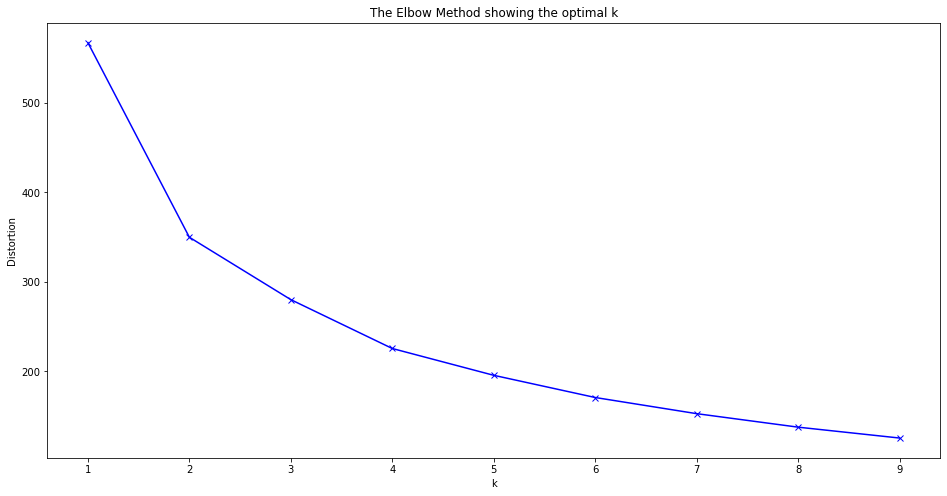

([567.0,
  349.72034950410585,
  280.05256030617863,
  225.48976105481617,
  195.54987614802278,
  170.7612398919871,
  152.71348268778638,
  137.64119373145684,
  125.496173482538],
 None)

In [49]:
student_data = tb_ok.drop("Gender",axis=1)
# sc = StandardScaler()
X_student_data = sc.fit_transform(student_data)
elbow_curve(X_student_data)

In [50]:
heirach_student = AgglomerativeClustering(n_clusters=4).fit(X_student_data)

In [51]:
tb_ok["Student_Cluster"] = heirach_student.labels_

In [52]:
tb_ok.groupby("Student_Cluster").mean()

,FreeTime,ImproveSelf,GenderSpec,LifeStyle,BasisLife,Specific,EveryDay,CareSelf,AGE,Gender
Student_Cluster,,,,,,,,,,
0,2.055000,2.152179,2.149615,2.189006,1.907500,2.045536,2.130375,2.176536,31.300000,0.533333
1,3.711538,3.400296,3.320451,3.236230,2.508654,2.549519,2.604327,2.565269,28.538462,0.692308
2,2.115385,2.269822,2.333691,2.366714,2.918269,2.907349,2.877525,2.883510,34.153846,0.615385
3,3.455357,3.265797,3.245072,3.219740,3.648214,3.539158,3.443795,3.351532,28.571429,0.285714


In [53]:
grp_df[["บุฟเฟต์","Raing_Buffet"]].groupby("Raing_Buffet").mean()

NameError: name 'grp_df' is not defined